In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/breast_cancer_survival.csv")

In [ ]:
df.head()


,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
null_columns = df.columns[df.isnull().any()]
null_counts = df[null_columns].isnull().sum()

print("Columns with null values:")
for column in null_columns:
    print(f"{column}: {null_counts[column]} null values")

Columns with null values:
Date_of_Last_Visit: 17 null values
Patient_Status: 13 null values


In [ ]:
threshold_percentage = 0.1
threshold_count = len(df) * threshold_percentage

columns_to_drop = df.columns[df.isnull().sum() > threshold_count]
df = df.drop(columns=columns_to_drop)

df = df.dropna(subset=df.columns[df.isnull().sum() <= threshold_count])

df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 317 non-null    int64  
 1   Gender              317 non-null    object 
 2   Protein1            317 non-null    float64
 3   Protein2            317 non-null    float64
 4   Protein3            317 non-null    float64
 5   Protein4            317 non-null    float64
 6   Tumour_Stage        317 non-null    object 
 7   Histology           317 non-null    object 
 8   ER status           317 non-null    object 
 9   PR status           317 non-null    object 
 10  HER2 status         317 non-null    object 
 11  Surgery_type        317 non-null    object 
 12  Date_of_Surgery     317 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      317 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.6+ K

In [ ]:
duplicate_rows = df[df.duplicated()]

df = df.drop_duplicates()

df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


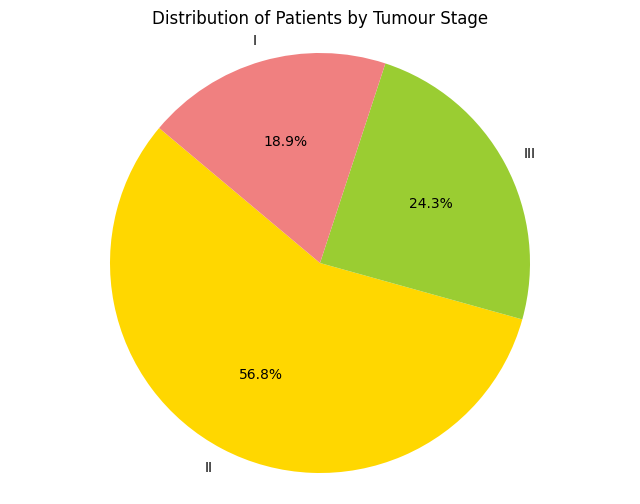

In [ ]:
tumour_stage_counts = df['Tumour_Stage'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral']

plt.figure(figsize=(8, 6))

plt.pie(tumour_stage_counts, labels=tumour_stage_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)


plt.title("Distribution of Patients by Tumour Stage")
plt.axis('equal')

plt.show()


In [ ]:
df.value_counts("Tumour_Stage")

Tumour_Stage
II     180
III     77
I       60
dtype: int64

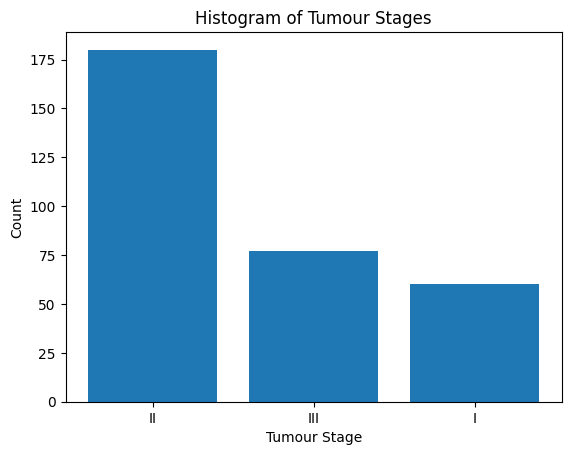

In [ ]:
tumour_stage_counts = df["Tumour_Stage"].value_counts()


plt.bar(tumour_stage_counts.index, tumour_stage_counts.values)
plt.xlabel("Tumour Stage")
plt.ylabel("Count")
plt.title("Histogram of Tumour Stages")

plt.show()

In [ ]:
unique_statuses = df['Patient_Status'].unique()


df = df.rename(columns={'Patient_Status': 'Target'})

label_mapping = {'Alive': 1, 'Dead': 0}
df['Target'] = df['Target'].map(label_mapping)
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Target
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,1
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,0
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,1
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,1
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,1


In [ ]:
bin_edges = [0, 20, 40, 60, 80, 100]

bin_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

df['age_bins'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)

df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Target,age_bins
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,1,41-60
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,0,41-60
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,1,61-80
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,1,61-80
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,1,41-60


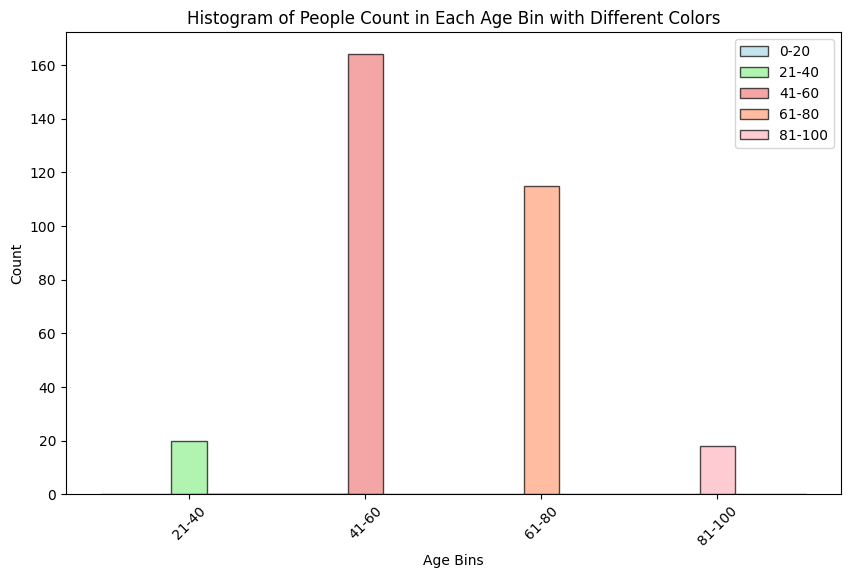

In [ ]:


bin_colors = {'0-20': 'lightblue', '21-40': 'lightgreen', '41-60': 'lightcoral',
              '61-80': 'lightsalmon', '81-100': 'lightpink'}

plt.figure(figsize=(10, 6))
for bin_label in bin_labels:
    bin_data = df[df['age_bins'] == bin_label]
    plt.hist(bin_data['age_bins'], bins=len(bin_labels), alpha=0.7, color=bin_colors[bin_label],
             label=bin_label, edgecolor='black', stacked=True)

plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Histogram of People Count in Each Age Bin with Different Colors')
plt.xticks(rotation=45)
plt.legend()

plt.show()

FEMALE    313
MALE        4
Name: Gender, dtype: int64


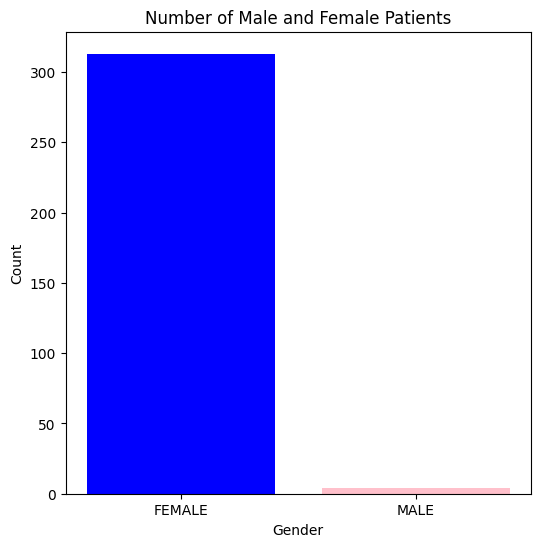

In [ ]:
gender_counts = df['Gender'].value_counts()
print(gender_counts)
plt.figure(figsize=(6, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Male and Female Patients')
plt.show()

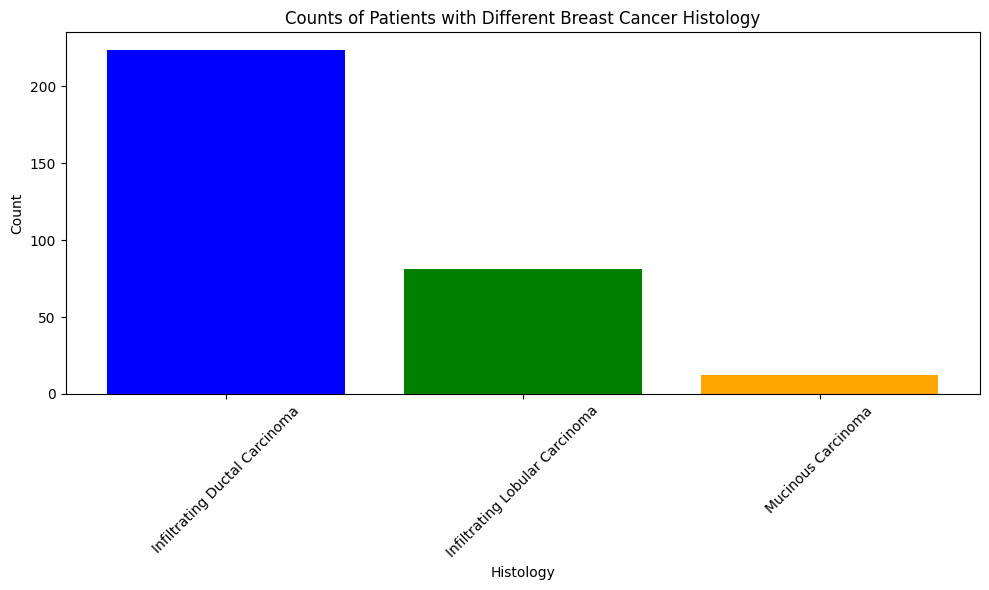

In [ ]:
histology_counts = df['Histology'].value_counts()

histology_colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(histology_counts.index, histology_counts.values, color=histology_colors)
plt.xlabel('Histology')
plt.ylabel('Count')
plt.title('Counts of Patients with Different Breast Cancer Histology')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
most_frequent_surgery = df['Surgery_type'].value_counts().idxmax()

print("The most frequent surgery performed is:", most_frequent_surgery)

The most frequent surgery performed is: Other


In [ ]:
surgery_by_histology = df.groupby('Histology')['Surgery_type'].value_counts()

for histology, surgery_counts in surgery_by_histology.groupby(level=0):
    most_prevalent_surgery = surgery_counts.idxmax()
    print(f"Prevalent surgery type for {histology} histology: {most_prevalent_surgery}")

Prevalent surgery type for Infiltrating Ductal Carcinoma histology: ('Infiltrating Ductal Carcinoma', 'Other')
Prevalent surgery type for Infiltrating Lobular Carcinoma histology: ('Infiltrating Lobular Carcinoma', 'Other')
Prevalent surgery type for Mucinous Carcinoma histology: ('Mucinous Carcinoma', 'Lumpectomy')


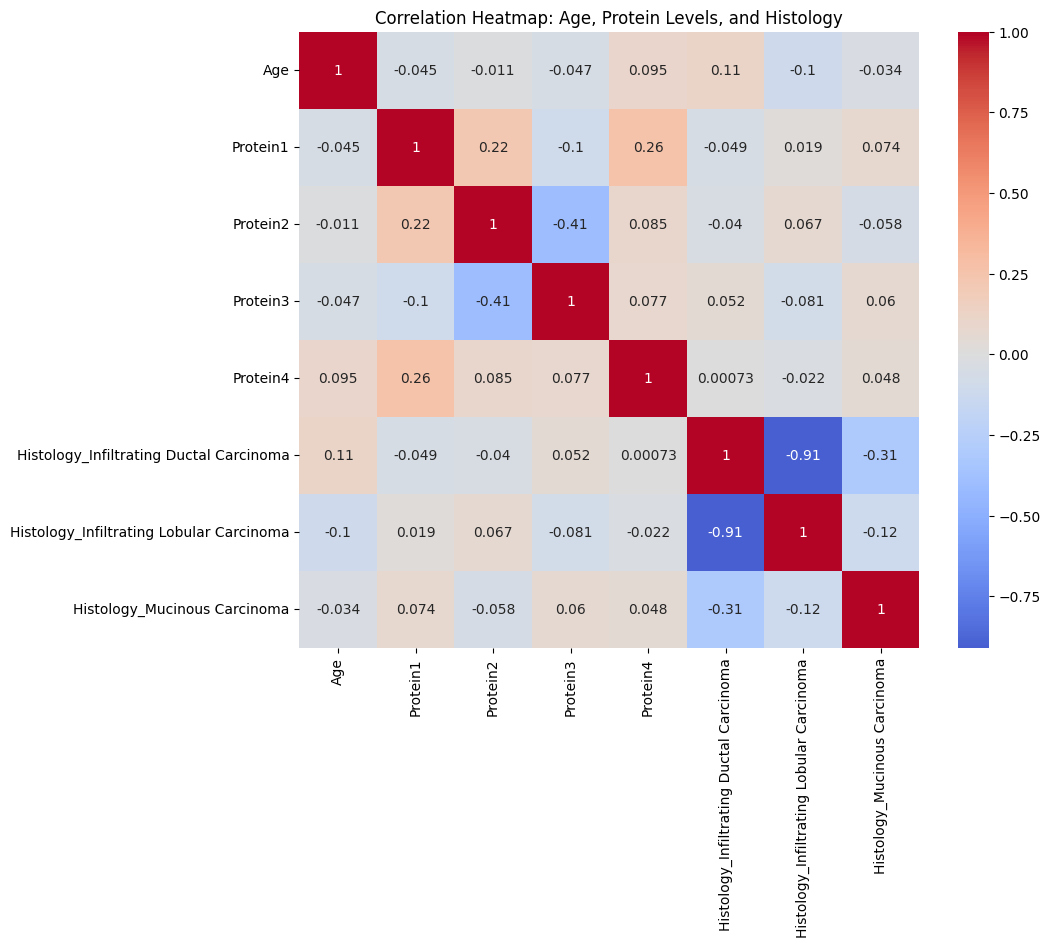

In [ ]:
selected_columns = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Histology']

subset_df = df[selected_columns]

subset_df = pd.get_dummies(subset_df, columns=['Histology'], prefix=['Histology'])

correlation_matrix = subset_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Age, Protein Levels, and Histology')
plt.show()

In [ ]:
# What was your analysis of the entire dataset from the above colab notebook


# 1. There are many women who fall in 3rd stage of cancer i.e 56.8%
# 2. There are some outliers inn the dataset with respect to gender as there 4 men who have breast cancer which is not possible
# 3. Breast cancer is mostly detected in age group 41-60 cause of genetic mutations